## Use-case : A Venture Capitalist Investment company has hired you as a ML engineer to create a ML model that can predict the annual profit earned based on their spending pattern and company's location

1. Given data contains only relevant columns
2. Given data has no missing values
3. Given data has categorical columns, thus need to be handled.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('50_Startups.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [5]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
#Features
# R&D Spend --- numeric ---- float
# Adm --------- numeric ---- float
# Mark -------- numeric ---- float
# State ------- categorical ---- String
#Label
# Profit ------ numeric ----- float
#Since my label is numeric, therefore I will consider this use-case as a regression use-case
#Handle Categorical Data
# Check relationship with label and respective features individually

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002EED99EF6D8>,
      dtype=object)

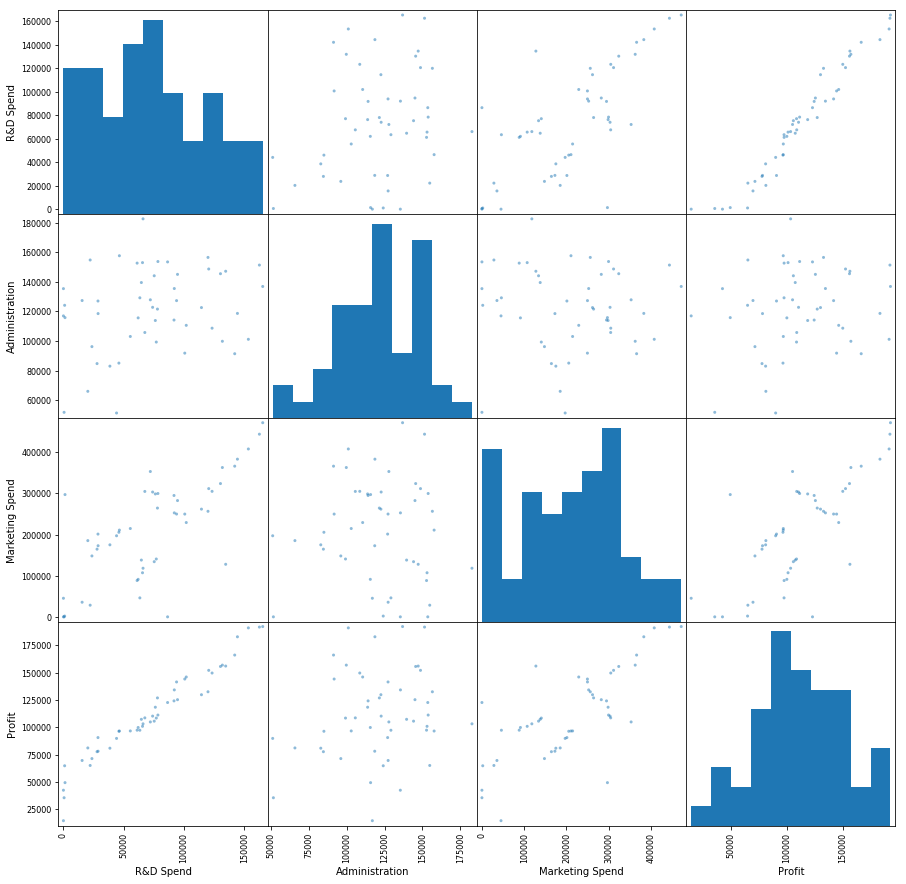

In [12]:
pd.scatter_matrix(data , figsize=(15,15))


In [29]:
features = data.iloc[:,:-1].values
label = data.iloc[:,[-1]].values


In [30]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
encoder = LabelEncoder()
features[:,3] = encoder.fit_transform(features[:,3])

In [31]:
ohe = OneHotEncoder(categorical_features=[3])
features = ohe.fit_transform(features).toarray()

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size = 0.2,
                                                random_state = 1)

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
model.score(X_train,y_train)

0.9424465426893971

In [36]:
model.score(X_test,y_test)

0.9649618042060633

In [38]:
encoder.classes_

array(['California', 'Florida', 'New York'], dtype=object)

In [37]:
features[0,:]
#California,Florida,NY,R&D Spend, Adm, Mark

array([0.000000e+00, 0.000000e+00, 1.000000e+00, 1.653492e+05,
       1.368978e+05, 4.717841e+05])

In [39]:
newData = np.array([[0,1,0,78978,34567,23345]])

In [41]:
model.predict(newData)

array([[111637.09262093]])

In [42]:
model.coef_

array([[-2.85177769e+02,  2.97560876e+02, -1.23831070e+01,
         7.74342081e-01, -9.44369585e-03,  2.89183133e-02]])

In [43]:
model.intercept_

array([49834.88507322])

In [46]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000
